In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

pd.set_option("display.width", 1000)
pd.set_option("display.max_columns", None)
pd.options.display.float_format = "{:.5f}".format

In [68]:
master_df_scaled = pd.read_pickle("../data/processed/master_df_scaled.pkl")
master_df = pd.read_pickle("../data/processed/master_df.pkl")

In [69]:
master_df_scaled.head()

,naics1_occ1,naics1_occ2,naics1_occ3,naics1_occ4,naics1_occ5,naics2-5_occ1-5,naics1_est,naics2-3_est,naics4-5_est,naics1_ap,naics2_ap,naics3-5_ap,mean_gdp
FIPS,,,,,,,,,,,,,
1001,-0.207452,-0.200259,0.851999,-0.182367,0.719479,-0.262016,-0.231371,-0.241319,-0.184582,-0.235193,-0.200955,-0.240455,-0.167000
1003,0.583683,0.720506,0.851999,0.309340,0.719479,0.339027,0.572403,-0.014864,0.672864,0.441347,0.105159,0.196599,0.007491
1005,-0.312937,-0.302567,-1.033262,-0.346269,-1.131038,-0.278947,-0.369161,-0.241319,-0.291763,-0.262195,-0.200955,-0.303942,-0.156293
1007,-0.260194,-0.251413,-1.033262,-0.182367,0.719479,-0.199936,-0.311748,-0.241319,-0.286404,-0.243757,-0.200955,0.126384,-0.180788
1009,-0.154710,-0.097952,0.851999,-0.182367,0.719479,-0.262016,-0.150993,-0.241319,-0.130992,-0.177462,-0.200955,-0.247821,-0.181004


<function matplotlib.pyplot.show(close=None, block=None)>

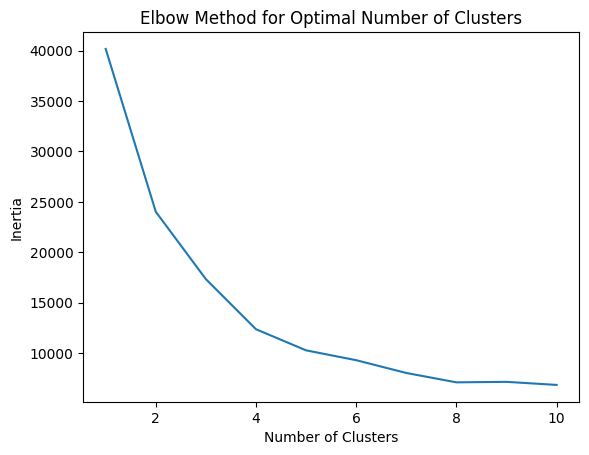

In [70]:
inertia = []
for n in range(1, 11):
  kmeans = KMeans(n_clusters=n, random_state=42)
  kmeans.fit(master_df_scaled)
  inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.show

In [71]:
optimal_clusters = 4

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters  = kmeans.fit_predict(master_df_scaled)

master_df_scaled["clusters"] = clusters
master_df["clusters"] = clusters

In [72]:
sil_score = silhouette_score(master_df_scaled, clusters)
print(f"Silhoutte Score: {sil_score}")

Silhoutte Score: 0.7550818479933243


<function matplotlib.pyplot.show(close=None, block=None)>

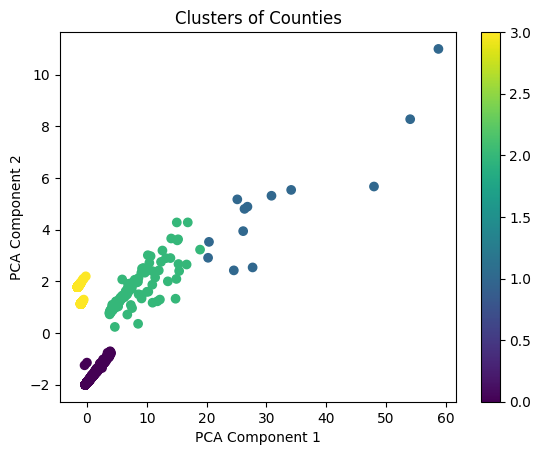

In [73]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(master_df_scaled)

plt.scatter(pca_features[:, 0], pca_features[:, 1], c=clusters, cmap="viridis")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Clusters of Counties")
plt.colorbar()
plt.show

In [74]:
cluster_analysis = master_df.groupby("clusters").mean()
print(cluster_analysis)

          naics1_occ1  naics1_occ2  naics1_occ3  naics1_occ4  naics1_occ5  naics2-5_occ1-5  naics1_est  naics2-3_est  naics4-5_est      naics1_ap      naics2_ap   naics3-5_ap      mean_gdp
clusters                                                                                                                                                                                    
0            5.182240     5.539430     1.000663     1.930417     0.998012        93.505633   32.082174      3.359178     58.151756   13055.220013    9392.519549  3.317261e+04  3.158705e+05
1          201.461538   215.076923     2.769231    65.230769     3.153846      3112.461538  844.846154    169.076923   1780.846154  746153.461538  437398.846154  1.150450e+06  2.145165e+07
2           54.395522    48.582090     1.097015    16.305970     1.208955       887.798507  273.738806     41.761194    521.492537  175017.731343  123730.873134  2.862160e+05  2.999823e+06
3            0.418702     0.422889     0.000000     0.4